# Ages X Disorder

In [1]:
import pandas as pd

Age_avg_onset = pd.read_excel('.\Ages_Disorder\AverageAgeOfOnset.xlsx', index_col=None)
Disorder_Age = pd.read_excel('.\Ages_Disorder\Disorder_age.xlsx', index_col=None)

In [2]:
Age_avg_onset.columns

Index(['Average_age_onset_id', 'Disorder_id', 'Average_age_onset',
       'Onset_class_id'],
      dtype='object')

In [3]:
Disorder_Age.shape

(6577, 11)

In [4]:
Disorder_Age.columns

Index(['Disorder_id', 'Disorder_name', 'Disorder_id_2', 'Disorder_type',
       'Disorder_type_id', 'Disorder_group', 'Disorder_group_id',
       'Average_age_death', 'Average_age_death_id', 'Inheritance_type',
       'Inheritance_type_id'],
      dtype='object')

In [5]:
Age_avg_onset.Average_age_onset.value_counts()

Neonatal             2855
Infancy              2305
Childhood            1450
Adult                1267
All ages              832
Adolescent            667
Antenatal             621
Elderly               245
No data available      40
Name: Average_age_onset, dtype: int64

In [6]:
Disorder_Age.Average_age_death.value_counts()

No data available         1207
normal life expectancy    1026
any age                    447
adult                      270
early childhood            235
infantile                  209
adolescent                  97
elderly                     64
embryofetal                 21
late childhood              20
young Adult                 18
stillbirth                  13
Not yet documented           4
Name: Average_age_death, dtype: int64

In [7]:
Disorder_Age.Inheritance_type.value_counts()

Autosomal recessive          1890
Autosomal dominant           1660
Not applicable                981
Unknown                       252
X-linked recessive            252
Multigenic/multifactorial     171
X-linked dominant              59
Mitochondrial inheritance      20
No data available              17
Semi-dominant                   4
Y-linked                        1
Name: Inheritance_type, dtype: int64

A disease should have just a type of Inheritance_type. In fact look below...

In [8]:
Disorder_Age.groupby(["Disorder_id", "Inheritance_type"]).size().reset_index(name="Time")

,Disorder_id,Inheritance_type,Time
0,1,Autosomal recessive,1
1,2,Autosomal dominant,1
2,4,Autosomal recessive,1
3,7,Autosomal recessive,1
4,9,Autosomal recessive,1
...,...,...,...
5302,6571,Autosomal dominant,1
5303,6572,Autosomal dominant,1
5304,6573,Autosomal dominant,1
5305,6575,Multigenic/multifactorial,1


# Age onset and of death per disease 
### ALS as example

In [9]:
Disorder_Age.groupby(["Disorder_id", "Average_age_death"]).size().reset_index(name="Time")

,Disorder_id,Average_age_death,Time
0,2,any age,1
1,3,No data available,1
2,4,any age,1
3,5,No data available,1
4,6,No data available,1
...,...,...,...
3626,6566,normal life expectancy,1
3627,6569,normal life expectancy,1
3628,6570,early childhood,1
3629,6574,No data available,1


!! PROBLEM !! (but not a big deal) : one ID can have multiple Average_age_onset

In [10]:
(Age_avg_onset.groupby(["Disorder_id", "Average_age_onset"]).size().reset_index(name="Time"))

,Disorder_id,Average_age_onset,Time
0,1,Infancy,1
1,1,Neonatal,1
2,2,All ages,1
3,3,Childhood,1
4,3,Infancy,1
...,...,...,...
10277,6575,Neonatal,1
10278,6576,Infancy,1
10279,6576,Neonatal,1
10280,6577,Infancy,1


Let's merge everything in a table and let's make it clear removing IDs. All the info we want are in "df". We just need to filter it with the disease ID

In [11]:
df = Disorder_Age.merge(Age_avg_onset[['Disorder_id', 'Average_age_onset']], on='Disorder_id', how='left')
df = df[['Disorder_id_2', 'Disorder_name', 'Disorder_type', 'Disorder_group','Inheritance_type',
         'Average_age_onset', 'Average_age_death']]

df.head()

,Disorder_id_2,Disorder_name,Disorder_type,Disorder_group,Inheritance_type,Average_age_onset,Average_age_death
0,17601,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Disorder,Autosomal recessive,Infancy,NaN
1,17601,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Disorder,Autosomal recessive,Neonatal,NaN
2,2,Alexander disease,Disease,Disorder,Autosomal dominant,All ages,any age
3,17603,"Multiple epiphyseal dysplasia, with miniepiphyses",Disease,Disorder,NaN,Childhood,No data available
4,17603,"Multiple epiphyseal dysplasia, with miniepiphyses",Disease,Disorder,NaN,Infancy,No data available


Now we just need to filter for the disease to return the info related to it

In [12]:
df[df['Disorder_id_2'] == 106]

,Disorder_id_2,Disorder_name,Disorder_type,Disorder_group,Inheritance_type,Average_age_onset,Average_age_death
183,106,Amyotrophic lateral sclerosis,Disease,Disorder,Autosomal dominant,Adult,adult


In [13]:
df.to_excel("df_age_disorder.xlsx")  

The only problem is that if a disease has multiple Average_age_onset there are multiple entries.

Possible solution : We can take the "lowest"  Average_age_onset

## Inheritance type of the diseases in the dataset 

In [14]:
Inheritance_df = pd.DataFrame(Disorder_Age.Inheritance_type.value_counts())
Inheritance_df = Inheritance_df.reset_index()
Inheritance_df = Inheritance_df.rename(columns = {'index':'Inheritance_type','Inheritance_type':'Count' })
Inheritance_df

,Inheritance_type,Count
0,Autosomal recessive,1890
1,Autosomal dominant,1660
2,Not applicable,981
3,Unknown,252
4,X-linked recessive,252
5,Multigenic/multifactorial,171
6,X-linked dominant,59
7,Mitochondrial inheritance,20
8,No data available,17
9,Semi-dominant,4


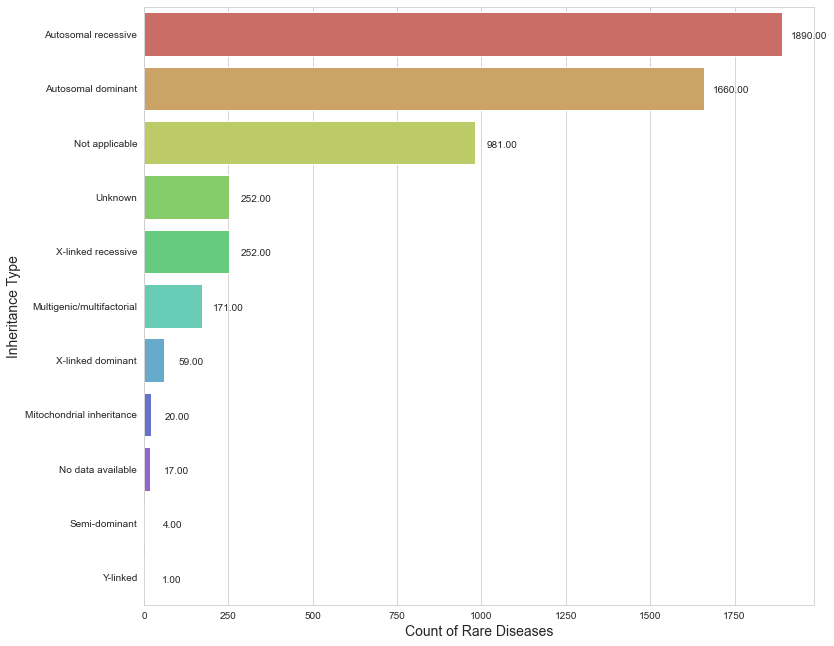

In [15]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# a4_dims = (11.7, 8.27)
# fig, ax = pyplot.subplots(figsize=a4_dims)    
plt.figure(figsize=(12,11))

sns.set_style('whitegrid')

j = sns.barplot(x = "Count", y = "Inheritance_type", data = Inheritance_df, palette = 'hls')

for p in j.patches:
    width = p.get_width()
    plt.text(80+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
    
plt.xlabel("Count of Rare Diseases", size=14)
plt.ylabel("Inheritance Type", size=14) 

plt.show()

# Average age on set of rare diseases in the data

In [16]:
Age_onset = pd.DataFrame(Age_avg_onset.Average_age_onset.value_counts())
Age_onset = Age_onset.reset_index()
Age_onset = Age_onset.rename(columns = {'index':'Average_age_onset','Average_age_onset':'Count' })
Age_onset

,Average_age_onset,Count
0,Neonatal,2855
1,Infancy,2305
2,Childhood,1450
3,Adult,1267
4,All ages,832
5,Adolescent,667
6,Antenatal,621
7,Elderly,245
8,No data available,40


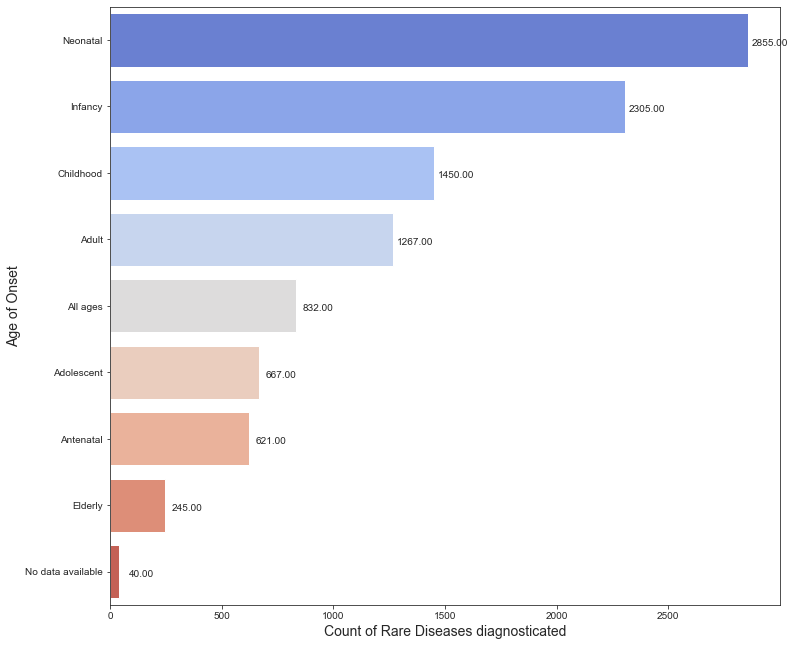

In [17]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# a4_dims = (11.7, 8.27)
# fig, ax = pyplot.subplots(figsize=a4_dims)    
plt.figure(figsize=(12,11))

sns.set_style('ticks')

f = sns.barplot(x = "Count", y = "Average_age_onset", data = Age_onset, palette = 'coolwarm')

for p in f.patches:
    width = p.get_width()
    plt.text(100+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.xlabel("Count of Rare Diseases diagnosticated", size=14)
plt.ylabel("Age of Onset", size=14) 

plt.show()

In [18]:
Age_death = pd.DataFrame(Disorder_Age.Average_age_death.value_counts())
Age_death = Age_death.reset_index()
Age_death = Age_death.rename(columns = {'index':'Average_age_death','Average_age_death':'Count' })
Age_death

,Average_age_death,Count
0,No data available,1207
1,normal life expectancy,1026
2,any age,447
3,adult,270
4,early childhood,235
5,infantile,209
6,adolescent,97
7,elderly,64
8,embryofetal,21
9,late childhood,20


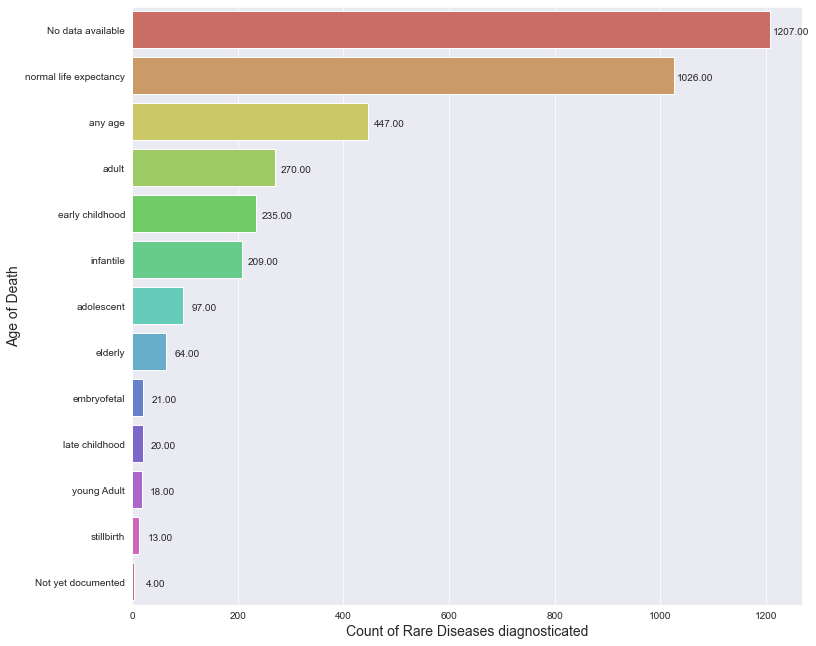

In [19]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# a4_dims = (11.7, 8.27)
# fig, ax = pyplot.subplots(figsize=a4_dims)    
plt.figure(figsize=(12,11))

sns.set_style('darkgrid')

k = sns.barplot(x = "Count", y = "Average_age_death", data = Age_death, palette = 'hls')

for p in k.patches:
    width = p.get_width()
    plt.text(40+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.xlabel("Count of Rare Diseases diagnosticated", size=14)
plt.ylabel("Age of Death", size=14) 

plt.show()